$\Large\textbf{Lab 2. Exercise 1. }$



We saw that for quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-2)^2 + (x_2 + 3)^2$.

# ***Part 1 and 2:*** *General code and definitions* 

In [28]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+3)**2 + (-2+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-2), 2*(x[1]+3)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  step_length = (np.dot(gradf.T, gradf)) / (np.matmul(np.matmul(gradf.T,2*A ),gradf))
  
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*p) > (evalf(x) + gamma * alpha * np.dot(gradf.T, p)) ):
    alpha = alpha*rho
  
  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [13]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')

    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')

    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1

    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


# ***Part 3*** : *Minimizer and the minimum value for*

$f( x) \ =\ ( x_{1} -2)^{2} +( x_{2} +3)^{2}$




In [46]:

my_start_x = np.array([5,5])
my_tol= 1e-5

print('Using Exact line search  :- ')
x_opt, k_opt = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print('The optimal value of x1 and x2 are :',x_opt)
print('The value of the function at this point :' , evalf(x_opt))

print('\n')

#check what happens when you call find_minimzer using backtracking line search
print('Using Backtracking Line search :- ')
x_opt_bls, k_opt_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('The optimal value of x : ',x_opt_bls)
print('The minimum value of f(x) at x :', evalf(x_opt_bls))


Using Exact line search  :- 
The optimal value of x1 and x2 are : [ 2.00000151 -2.99999598]
The value of the function at this point : 1.8408617293418483e-11


Using Backtracking Line search :- 
The optimal value of x :  [ 2. -3.]
The minimum value of f(x) at x : 0.0


# ***Part4:*** *Comparing exact line search with backtracking*

 \begin{array}{l}
\tau \ =\ 10^{-12}\\
x^{0} =\ ( 0,10)\\
\\
\alpha ^{0} \ =1\\
\rho \ =\ 0.5\\
\gamma \ =\ 0.5\ 
\end{array}

In [9]:
my_start_x = np.array([0,10])
my_tol= 10e-12

alpha_initial = 1
rho_ = 0.5
gamma_ = 0.5

x_opt_els, k_els = find_minimizer(my_start_x, my_tol,EXACT_LINE_SEARCH)
x_opt_bls, k_bls = find_minimizer(my_start_x, my_tol,BACKTRACKING_LINE_SEARCH, alpha_initial,rho_, gamma_ )

print('\n')
print('No. of iterations in Exact Line Search :', k_els)
print('No. of iterations in Backtracking Line Search :', k_bls)





Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5


No. of iterations in Exact Line Search : 1
No. of iterations in Backtracking Line Search : 1


***Remarks :*** *We observe that in both the cases the number of iteration is just 1. In the ELS, we minimised a quardratic function to solve for the optimal value of step size that minimize f(x). Since this function was quadratic it was easy to calculate such value in closed form. In BLS we take some initial value of alpha and then redunce it such that $f(x+ \alpha p) < f(x)$ This method is also useful in higher dimensions and guarantees sort of that alpha*





# ***Part 5:*** *Behavior of the backtracking linesearch algorithm for different choices of $\alpha^0$*

$\alpha^0 \in {\{ 1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01 \}}$

$x^0 = (10,10)$

$\tau = 10^{-9} $

$\rho \ =\ 0.5\\$

$\gamma \ =\ 0.5\ $



,alpha,x_bls,f(x_bls),iterations_bls,x_els,f(x_els),iterations_els
0,1.00,"[2.0, -3.0]",0.000000e+00,1,[ 2. -3.],0.0,1
1,0.90,"[2.0000000008, -2.9999999987]",2.330000e-18,10,[ 2. -3.],0.0,1
2,0.75,"[2.000000001862645, -2.9999999969732016]",1.263096e-17,16,[ 2. -3.],0.0,1
3,0.60,"[2.0000000022517996, -2.9999999963408253]",1.846016e-17,24,[ 2. -3.],0.0,1
4,0.50,"[2.0, -3.0]",0.000000e+00,1,[ 2. -3.],0.0,1
5,0.40,"[2.00000000131072, -2.99999999787008]",6.254545e-18,14,[ 2. -3.],0.0,1
6,0.25,"[2.000000001862645, -2.9999999969732016]",1.263096e-17,32,[ 2. -3.],0.0,1
7,0.10,"[2.0000000025462947, -2.9999999958622707]",2.360442e-17,98,[ 2. -3.],0.0,1
8,0.01,"[2.000000002568644, -2.999999995825952]",2.402061e-17,1082,[ 2. -3.],0.0,1


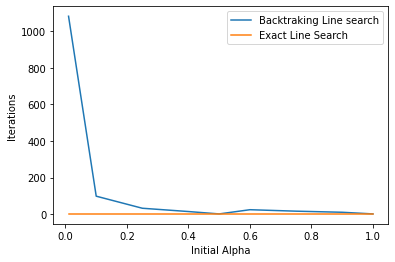

In [43]:
my_start_x = np.array([10,10])
my_tol= 10e-9

alpha_arr = np.array([1,0.9,0.75, 0.6,0.5,0.4,0.25,0.1,0.01])
rho_ = 0.5
gamma_ = 0.5




x_arr_bls = []
iter_bls = []

for i in alpha_arr:

  x, k = find_minimizer(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,i, rho_, gamma_ )
  x_arr_bls.append(x)
  iter_bls.append(k)


x_els, k_els = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH) 

df = pd.DataFrame(columns=['alpha', 'x_bls', 'f(x_bls)','iterations_bls', 'x_els', 'f(x_els)', 'iterations_els'])

df['alpha'] = alpha_arr
df['x_bls'] = x_arr_bls
df['f(x_bls)'] = df['x_bls'].apply(evalf)
df['iterations_bls'] = iter_bls
df['x_els'] = str(x_els)
df['f(x_els)'] = evalf(x_els)
df['iterations_els'] = k_els

display(df)

print('\n\n')
plt.plot(alpha_arr, iter_bls, label='Backtraking Line search')
plt.plot(alpha_arr, [k_els]*9, label='Exact Line Search')
plt.xlabel('Initial Alpha')
plt.ylabel('Iterations')
plt.legend()
plt.show()






***Remarks :*** *We observe that the number of iterations performed by ELS is always 1 and is always less than equal to that of performed by the BLS. Also the lesset the value of the initial alpha the more iterations it takes to find the optimal value of the function. Since the given function f is a quadratic function, ELS has an advantage over BLS in calculating the optimal value faster. When the step size is in fact 0.5, even BLS calculates the answer in 1 iteration. The optimal value of x is (2, -3) and the value of the function at this point is zero*

# ***Part 6:*** *Behavior of the backtracking linesearch algorithm for different choices of $\rho$*

$\alpha^0 = 1$

$x^0 = (10,10)$

$\tau = 10^{-9} $

$\rho \in \{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\} $

$\gamma =0.5$



,rho,x_bls,f(x_bls),iterations_bls,x_els,f(x_els),iterations_els
0,0.90,"[2.000000002322482, -2.999999996225967]",1.963725e-17,7,[ 2. -3.],0.0,1
1,0.80,"[2.0000000017646946, -2.9999999971323716]",1.133744e-17,13,[ 2. -3.],0.0,1
2,0.75,"[2.0000000016940658, -2.999999997247143]",1.044808e-17,12,[ 2. -3.],0.0,1
3,0.60,"[2.0000000008952297, -2.9999999985452517]",2.917729e-18,18,[ 2. -3.],0.0,1
4,0.50,"[2.0, -3.0]",0.000000e+00,1,[ 2. -3.],0.0,1
5,0.40,"[2.00000000131072, -2.99999999787008]",6.254545e-18,14,[ 2. -3.],0.0,1
6,0.25,"[2.000000001862645, -2.9999999969732016]",1.263096e-17,32,[ 2. -3.],0.0,1
7,0.10,"[2.0000000025462947, -2.9999999958622707]",2.360442e-17,98,[ 2. -3.],0.0,1
8,0.01,"[2.000000002568644, -2.999999995825952]",2.402061e-17,1082,[ 2. -3.],0.0,1


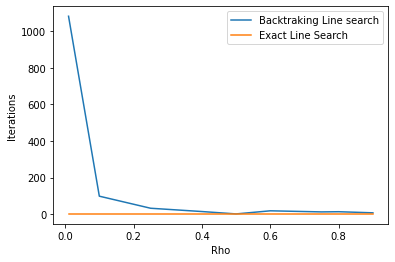

In [45]:
my_start_x = np.array([10,10])
my_tol= 10e-9

alpha_initial = 1 
rho_arr = np.array([0.9, 0.8, 0.75, 0.6,0.5,0.4,0.25,0.1,0.01])
gamma_ = 0.5




x_arr_bls = []
iter_bls = []

for i in rho_arr:

  x, k = find_minimizer(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_initial,i, gamma_ )
  x_arr_bls.append(x)
  iter_bls.append(k)


x_els, k_els = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH) 

df = pd.DataFrame(columns=['rho', 'x_bls', 'f(x_bls)','iterations_bls', 'x_els', 'f(x_els)', 'iterations_els'])

df['rho'] = rho_arr
df['x_bls'] = x_arr_bls
df['f(x_bls)'] = df['x_bls'].apply(evalf)
df['iterations_bls'] = iter_bls
df['x_els'] = str(x_els)
df['f(x_els)'] = evalf(x_els)
df['iterations_els'] = k_els

display(df)

print('\n\n')
plt.plot(rho_arr, iter_bls, label='Backtraking Line search')
plt.plot(rho_arr, [k_els]*9, label='Exact Line Search')
plt.xlabel('Rho')
plt.ylabel('Iterations')
plt.legend()
plt.show()




***Remarks :*** *We observe that as $\rho$ decreases the number of iterations performed increases. Because the update in the value of $\alpha$ is determined by $\rho$. If the value of $\rho$ is less, $\alpha$ updates very slowly. Also since the f(x) here is a qudratic function, we see that ELS outperforms BLS since we can get the perfect closed form solution for the step size in ELS*